In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<function matplotlib.pyplot.show(close=None, block=None)>

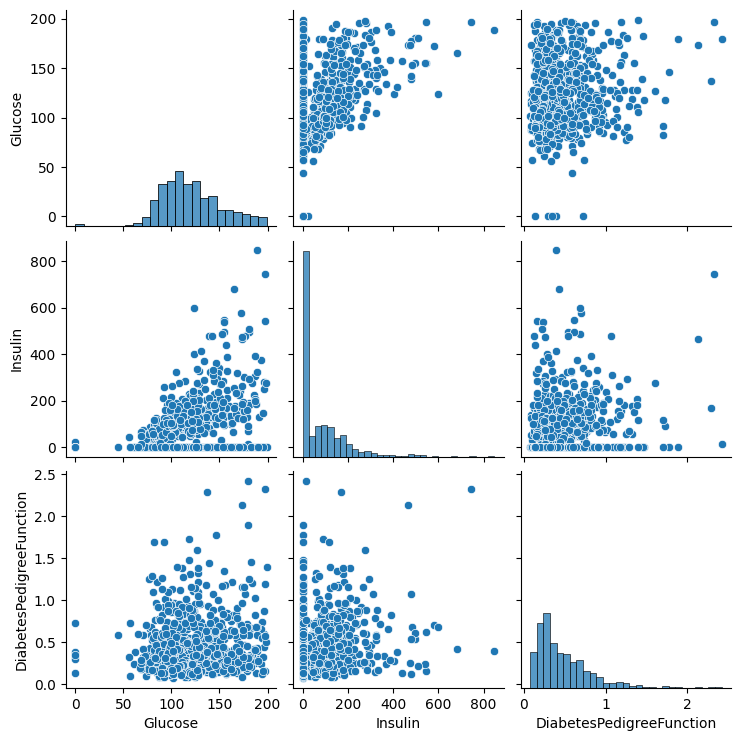

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Glucose','Insulin','DiabetesPedigreeFunction']
sns.pairplot(df[cols])
plt.show

<Axes: >

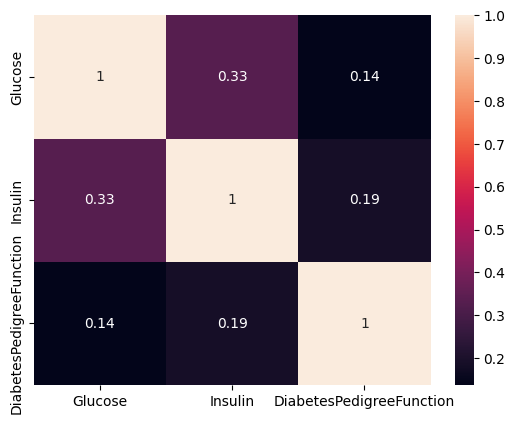

In [ ]:
import seaborn as sns
cols = ['Glucose','Insulin','DiabetesPedigreeFunction']
sns.heatmap(df[cols].corr(),annot = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Variables independientes
X = df[['Glucose','Insulin','DiabetesPedigreeFunction']].values
#Variables dependientes
Y = df [['Outcome']].values.reshape(-1,1)

ss_X = StandardScaler()
ss_Y = StandardScaler()

X_ss = ss_X.fit_transform(X)
Y_ss = ss_Y.fit_transform(Y)

lr = LinearRegression()
lr.fit (X_ss,Y_ss)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar datos
df = pd.read_csv('diabetes.csv')

# Variables independientes (predictoras)
X = df[['Glucose','Insulin','DiabetesPedigreeFunction']].values
# Variable dependiente (binaria)
Y = df[['Outcome']].values.ravel()  # .ravel() para vector plano

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Modelo: Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluación
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]  # probabilidad de clase 1 (diabetes)

print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Coeficientes para ver la importancia de cada variable
coef_df = pd.DataFrame({
    "Variable": ['Glucose','Insulin','DiabetesPedigreeFunction'],
    "Peso": logreg.coef_[0]
})
print("\nPesos de las variables en la predicción:\n", coef_df)

# ---- Predicción con entrada manual ----
print("\n=== Predicción Manual ===")
glucosa = float(input("Ingrese nivel de glucosa: "))
insulina = float(input("Ingrese nivel de insulina: "))
dpf = float(input("Ingrese DiabetesPedigreeFunction: "))

entrada = [[glucosa, insulina, dpf]]
entrada_scaled = scaler.transform(entrada)

probabilidad = logreg.predict_proba(entrada_scaled)[0][1]
prediccion = logreg.predict(entrada_scaled)[0]

print(f"\nProbabilidad de diabetes: {probabilidad*100:.2f}%")
print("Predicción final:", "Diabetes" if prediccion==1 else "No diabetes")



Exactitud del modelo: 0.7012987012987013

Matriz de confusión:
 [[126  25]
 [ 44  36]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79       151
           1       0.59      0.45      0.51        80

    accuracy                           0.70       231
   macro avg       0.67      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231


Pesos de las variables en la predicción:
                    Variable      Peso
0                   Glucose  1.288223
1                   Insulin -0.118052
2  DiabetesPedigreeFunction  0.183353

=== Predicción Manual ===
